In [38]:
!pip install xgboost

     |████████████████████████████████| 1.7 MB 1.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.7/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import numpy as np
import pandas as pd
import pickle
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import LinearSVR, SVR
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('final_data.csv')
df.head()

,Dimensions,Blocks,Threads,Time,Speedup,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,10,1,1,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,10,1,2,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
2,10,1,4,0.04,1.000000,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,10,1,8,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
4,10,1,16,0.03,1.333333,0.001288,0.000429,0.000427,0.000434,0.000436,0.000436,0.000436,0.000436,0.179144,0.059715,0.000112,0.178915,0.004081,0.00102,0.000525,0.002445,0.000939,0.000313,0.000156,0.000394,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0


In [3]:
df = df.sample(frac=1).reset_index(drop=True)

In [4]:
df = df.iloc[:,:-15]

In [8]:
df.columns

Index(['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup',
       '[CUDA memcpy HtoD] Time', '[CUDA memcpy HtoD] Avg',
       '[CUDA memcpy HtoD] Min', '[CUDA memcpy HtoD] Max',
       '[CUDA memcpy DtoH] Time', '[CUDA memcpy DtoH] Avg',
       '[CUDA memcpy DtoH] Min', '[CUDA memcpy DtoH] Max', 'cudaMalloc Time',
       'cudaMalloc Avg', 'cudaMalloc Min', 'cudaMalloc Max', 'cudaMemcpy Time',
       'cudaMemcpy Avg', 'cudaMemcpy Min', 'cudaMemcpy Max', 'cudaFree Time',
       'cudaFree Avg', 'cudaFree Min', 'cudaFree Max', 'Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache 

In [4]:
columns = ['Dimensions', 'Blocks', 'Threads', 'Time', 'Speedup','Device Name',
       'Compute Capability', 'Total Global Memory', 'Shared Memory per Block',
       'Registers per Block', 'Warp Size', 'Maximum Threads per Block',
       'Thread Dimension Z', 'Thread Dimension Y', 'Thread Dimension X',
       'Grid Size Z', 'Grid Size Y', 'Grid Size X', 'Clock Rate',
       'Total Constant Memory', 'Multiprocessor Count', 'integrated',
       'Asynchronous Engine Count', 'Memory Bus Width', 'Memory Clock Rate',
       'L2 Cache Size', 'Maximum Threads per Multiprocessor',
       'Concurrent Kernels','num_grid', 'threads', 'cudaMalloc', 'cudaMemcpy', 'cudaFree', '+',
       'for', '-', '*', '/']

In [52]:
df = df[columns]

In [18]:
df

,Dimensions,Blocks,Threads,Time,Speedup,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels
0,10000,14,64,0.18,1.200000,NVIDIA GeForce GTX TITAN Z,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,915000.0,65536.0,15.0,0.0,1.0,384.0,3505000.0,1572864.0,2048.0,1.0
1,1000,10,1024,0.24,1.000000,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0
2,1000000,1,8,0.24,1.000000,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0
3,10,4,16,0.13,0.866667,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0
4,10,3,512,0.24,1.000000,NVIDIA TITAN V,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7025,100000,15,8,0.16,1.066667,NVIDIA GeForce RTX 2080 Ti,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0
7026,6400,400,4,2.61,37.285714,NVIDIA GeForce GTX TITAN X,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0
7027,100,4,4,0.08,0.800000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0
7028,10000,7,2,0.04,0.400000,NVIDIA GeForce GTX TITAN Black,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0


In [5]:
y = df['Speedup'].values
df.drop(['Speedup', 'Time'], axis = 1, inplace = True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030 entries, 0 to 7029
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Dimensions                          7030 non-null   int64  
 1   Blocks                              7030 non-null   int64  
 2   Threads                             7030 non-null   int64  
 3   [CUDA memcpy HtoD] Time             7030 non-null   float64
 4   [CUDA memcpy HtoD] Avg              7030 non-null   float64
 5   [CUDA memcpy HtoD] Min              7030 non-null   float64
 6   [CUDA memcpy HtoD] Max              7030 non-null   float64
 7   [CUDA memcpy DtoH] Time             7030 non-null   float64
 8   [CUDA memcpy DtoH] Avg              7030 non-null   float64
 9   [CUDA memcpy DtoH] Min              7030 non-null   float64
 10  [CUDA memcpy DtoH] Max              7030 non-null   float64
 11  cudaMalloc Time                     7030 no

In [6]:
df['Device Name'].unique().tolist()

['NVIDIA GeForce GTX TITAN X',
 'NVIDIA GeForce RTX 2080 Ti',
 'NVIDIA TITAN V',
 'NVIDIA GeForce GTX TITAN Black',
 'NVIDIA GeForce GTX TITAN Z']

In [7]:
oe = OrdinalEncoder()
gpus = oe.fit_transform(df['Device Name'].values.reshape(-1, 1))

In [9]:
df['Device Name'] = gpus

In [10]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100000,12,512,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,3584,4,10,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
2,10,14,128,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,256,4,6,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
4,7936,124,6,0.001204,0.000401,0.000345,0.000440,0.001240,0.001240,0.001240,0.001240,0.002403,0.000801,0.000008,0.002387,0.002457,0.000614,0.000349,0.001246,0.000688,0.000229,0.000023,0.000334,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [11]:
with open('utils/gpu_encoder.pickle', 'wb') as ge:
    pickle.dump(oe, ge)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

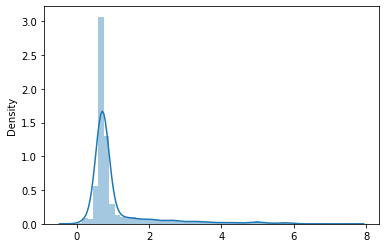

In [12]:
sns.distplot(np.log1p(y))

In [13]:
df.head()

,Dimensions,Blocks,Threads,[CUDA memcpy HtoD] Time cost,[CUDA memcpy HtoD] Avg cost,[CUDA memcpy HtoD] Min cost,[CUDA memcpy HtoD] Max cost,[CUDA memcpy DtoH] Time cost,[CUDA memcpy DtoH] Avg cost,[CUDA memcpy DtoH] Min cost,[CUDA memcpy DtoH] Max cost,cudaMalloc Time cost,cudaMalloc Avg cost,cudaMalloc Min cost,cudaMalloc Max cost,cudaMemcpy Time cost,cudaMemcpy Avg cost,cudaMemcpy Min cost,cudaMemcpy Max cost,cudaFree Time cost,cudaFree Avg cost,cudaFree Min cost,cudaFree Max cost,Device Name,Compute Capability,Total Global Memory,Shared Memory per Block,Registers per Block,Warp Size,Maximum Threads per Block,Thread Dimension Z,Thread Dimension Y,Thread Dimension X,Grid Size Z,Grid Size Y,Grid Size X,Clock Rate,Total Constant Memory,Multiprocessor Count,integrated,Asynchronous Engine Count,Memory Bus Width,Memory Clock Rate,L2 Cache Size,Maximum Threads per Multiprocessor,Concurrent Kernels,float,unsigned_int,int,num_blocks,num_grid,threads,cudaMalloc,cudaMemcpy,cudaFree,+,for,-,*,/
0,100000,12,512,0.002846,0.000949,0.000939,0.000954,0.001219,0.001219,0.001219,0.001219,0.258798,0.086266,0.000202,0.258384,0.007014,0.001753,0.001247,0.003230,0.001063,0.000354,0.000283,0.000390,1.0,5.2,12505984.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1215500.0,65536.0,24.0,0.0,2.0,384.0,3505000.0,3145728.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
1,3584,4,10,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
2,10,14,128,0.002337,0.000779,0.000775,0.000786,0.002577,0.002577,0.002577,0.002577,0.333979,0.111326,0.000239,0.333499,0.008094,0.002023,0.000998,0.005065,0.000681,0.000227,0.000178,0.000320,4.0,7.0,12356288.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1455000.0,65536.0,80.0,0.0,7.0,3072.0,850000.0,4718592.0,2048.0,1.0,28,0,26,0,0,10,3,8,3,4,1,0,3,0
3,256,4,6,0.001517,0.000506,0.000385,0.000613,0.001251,0.001251,0.001251,0.001251,0.011615,0.003872,0.000011,0.011594,0.002794,0.000698,0.000390,0.001266,0.000060,0.000020,0.000008,0.000031,3.0,7.5,11283904.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,1635000.0,65536.0,68.0,0.0,3.0,352.0,7000000.0,5767168.0,1024.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0
4,7936,124,6,0.001204,0.000401,0.000345,0.000440,0.001240,0.001240,0.001240,0.001240,0.002403,0.000801,0.000008,0.002387,0.002457,0.000614,0.000349,0.001246,0.000688,0.000229,0.000023,0.000334,0.0,3.5,6229696.0,49152.0,65536.0,32.0,1024.0,1024.0,1024.0,64.0,65535.0,65535.0,2.147484e+09,980000.0,65536.0,15.0,0.0,1.0,384.0,3500000.0,1572864.0,2048.0,1.0,29,0,18,0,0,0,3,8,3,0,0,0,0,0


In [14]:
X = df.values

In [15]:
#sc = RobustScaler()
sc = MinMaxScaler()
X_scaled = sc.fit_transform(X)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size = 0.15, random_state = 42)

In [17]:
def evaluate_model(model, X_train, y_train, X_val, y_val, metric='R2'):
    model.fit(X_train, y_train)
    if metric == 'RMSE':
        y_pred_train = model.predict(X_train)
        print('Training RMSE score = {}'.format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
        y_pred = model.predict(X_val)
        print('Validation RMSE score = {}'.format(np.sqrt(mean_squared_error(y_val, y_pred))))
    else:
        print('Training R2 score = {}'.format(model.score(X_train, y_train)))
        print('Validation R2 score = {}'.format(model.score(X_val, y_val)))

In [18]:
lr = LinearRegression()
evaluate_model(lr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 35.78527948415831
Validation RMSE score = 25.891155182669046


In [19]:
lasso = Lasso()
evaluate_model(lasso, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 38.40249519237571
Validation RMSE score = 26.90086786428748


In [20]:
ridge = Ridge()
evaluate_model(ridge, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 35.78926969033637
Validation RMSE score = 25.7801459659202


In [22]:
svr = SVR()
evaluate_model(svr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 40.061090921179506
Validation RMSE score = 28.524055677604505


In [23]:
lsvr = LinearSVR()
evaluate_model(lsvr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 40.033626355319036
Validation RMSE score = 28.488268198946177


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [24]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 0.4370003087176576
Validation RMSE score = 21.30936685584657


In [25]:
mlp = MLPRegressor(hidden_layer_sizes=(320,5))
evaluate_model(mlp, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 31.207964969316556
Validation RMSE score = 19.955961018564658


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [26]:
rfr = RandomForestRegressor(n_estimators = 200, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 10.055531268570727
Validation RMSE score = 17.921327428042446


In [70]:
rfe = RFE(rfr)
rfe = rfe.fit(X_train, y_train)
columns = [df.columns.tolist()[i] for i in range(len(df.columns.tolist())) if rfe.support_[i]]

In [71]:
columns

['Dimensions',
 'Blocks',
 'Threads',
 'Device Name',
 'Compute Capability',
 'Total Global Memory',
 'Clock Rate',
 'Multiprocessor Count',
 'Asynchronous Engine Count',
 'Memory Bus Width',
 'Memory Clock Rate',
 'L2 Cache Size',
 'Maximum Threads per Multiprocessor',
 'threads',
 '+',
 'for',
 '-',
 '*']

In [72]:
tdf = df[columns]

In [73]:
X_new = sc.fit_transform(tdf.values)

In [74]:
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size = 0.225, random_state = 42)

In [75]:
rfr = RandomForestRegressor(n_estimators = 250, max_depth = 15)
evaluate_model(rfr, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 56.91200671759923
Validation RMSE score = 170.12157958203187


In [76]:
xgb = XGBRegressor(n_estimators = 150)
evaluate_model(xgb, X_train, y_train, X_val, y_val, 'RMSE')

Training RMSE score = 0.6859607719492883
Validation RMSE score = 252.98156356085605


In [27]:
y_pred = xgb.predict(X_val)

In [28]:
y_pred[10]

1.8224084

In [29]:
y_val[10]

3.3125

In [30]:
y_pred = rfr.predict(X_val)

In [31]:
y_pred[20]

1.2633832033571006

In [32]:
y_val[20]

1.7999999999999998

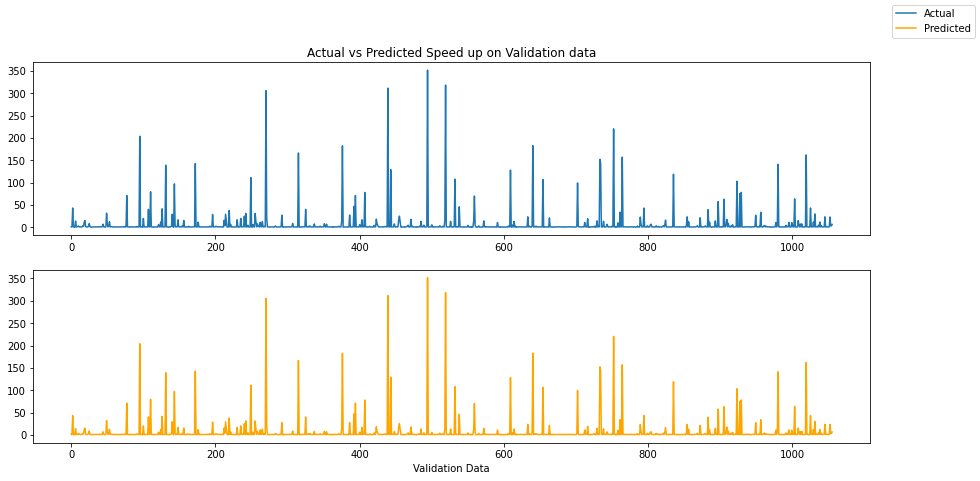

In [33]:
fig, axes = plt.subplots(2, 1, figsize = (15, 7))
axes[0].set_title('Actual vs Predicted Speed up on Validation data')
axes[0].plot(y_val, label = 'Actual')
axes[1].plot(y_val, label = 'Predicted', color = 'orange')
axes[1].set_xlabel('Validation Data')
fig.legend()
plt.savefig('validation_speedup_static.pdf')